<a href="https://colab.research.google.com/github/shyamalkar/2025_ML_Repository/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***`Classification`***


##MNIST

**Scikit-learn provides many helper functions to download popular datasets . MNIST is one of them.**

New version import

In [ ]:
!pip install -U scikit-learn # Import new version scikit learn library.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 52.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', parser='pandas', as_frame=False)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


***`Let's look at the arrays`***

In [ ]:
X,y = mnist["data"], mnist["target"].astype(int)
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


***`Matplotlib's imshow() funtion`***

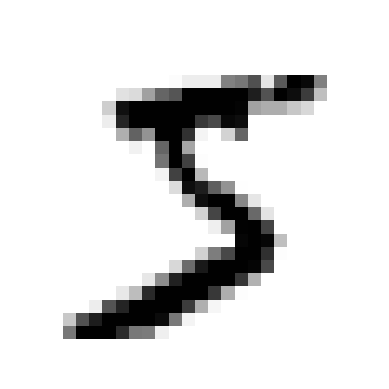

In [ ]:
import matplotlib.pyplot as plt # import library
import matplotlib as mpl

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap= mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
y[0]

np.int64(5)

**The label is a string, let's cast y to integers**

y = y.astype(np.uint8)


In [ ]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], X[60000:]

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

print(y_train_5.sum(),"Sample of digit 5")

5421 Sample of digit 5


# ***`Training a binary classifier`***

***`Implementing Cross-Validation`***

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

array([ True])

***`Implementing Cross-Validation`***

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]


  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct /len (y_pred))

0.9669
0.91625
0.96785


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator

class Never5Classifier (BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

**Can i guess this model's accuracy ? Let's find out**

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

Array = 91.125% accuracy, 90.855%, 90.915%

So the next step is -
# ***`Confusion matrix`***

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53115,  1464],
       [  916,  4505]])

Now we will understand this 2*2  table like this .

Meaning:

True Positive (TP) = 4096 → image 5 was, model understand 5

False Positive (FP) = 1522 → image 5 was not, model understand 5

False Negative (FN) = 1325 → image 5 chhilo, model understand not-5

True Negative (TN) = 53057 → image 5 has not not , model understand not-5

In [ ]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

***`Precision and recall`***
Scikit-learn provides several functions to compute classifier metrics, including precision and recall.

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1522)


0.7547327860613168

In [ ]:
recall_score(y_train_5, y_train_pred ) # == 4096 + (4096 + 1325 )

0.8310274857037447

***`Now try predict() method and decision_function() method, `***

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)


[ True]


***`The SGDClassifier use a threshold equal to 0, so the previous code returns the same result as the predict() method`***

In [ ]:
threshold = 8000

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import precision_recall_curve

y_scores = sgd_clf.decision_function(X_train)

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


***`Finally, I can plot precision and recall as functions of the threshold value using
Matplotlib`***

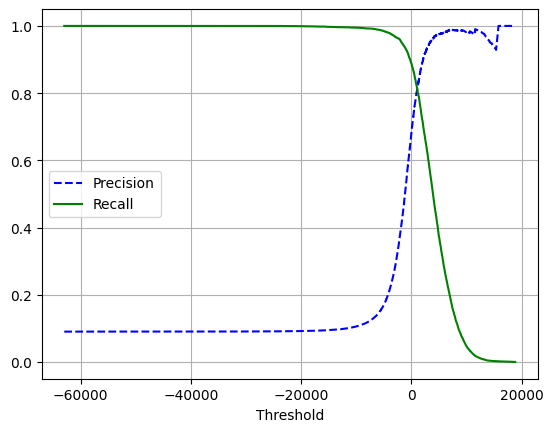

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

  plt.xlabel("Threshold")
  plt.legend(loc="best")
  plt.grid(True)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # ~7816
y_train_pred_90 = (y_scores >= threshold_90_precision)

# Lte's check these prediction's precision and recall:

precision_score(y_train_5, y_train_pred_90)

0.9000705384434516

In [ ]:
recall_score(y_train_5, y_train_pred_90)

0.7061427780852241

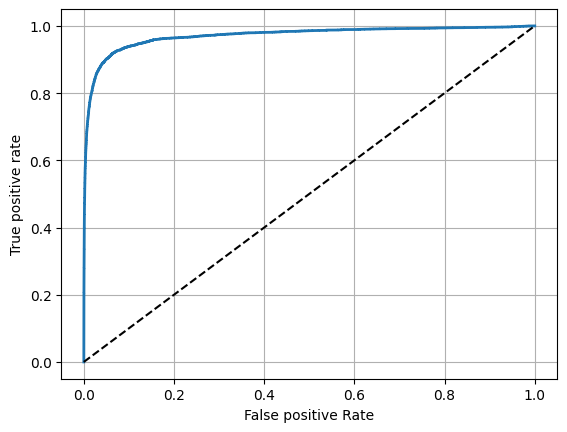

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0,1], 'k--')
  plt.xlabel("False positive Rate")
  plt.ylabel("True positive rate")
  plt.grid(True)

plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9709618248430906

***`Let's train a RandomForestClassifier and compare its ROC curve and ROC AUC`***

In [ ]:
from sklearn.ensemble import RandomForestClassifier


forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

***Now i am ready to plot the ROC curve. It is usefull to plot the first ROC curve as well to see how they compare ***

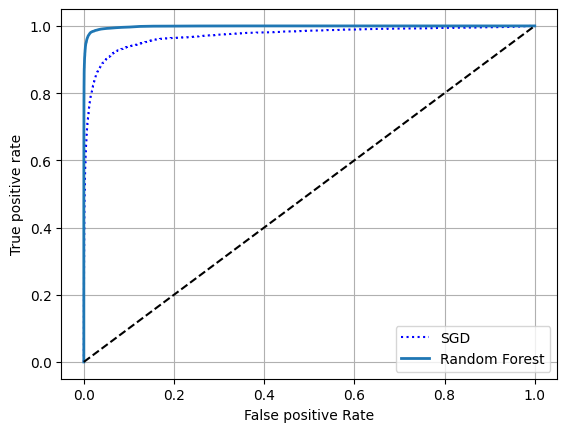

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

***Try measuring the precisionand recall scores: i find 99.0% precision and 86.6 % recall . Not too bad**

# ***Multiclass classification***

**When i try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvA (expect for SVM Classifiers for which is uses OvO(OvO = One versus One). Let's this with the SGDClassifier:**


***`Model make mistake so model define 3`***

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])


array([3])

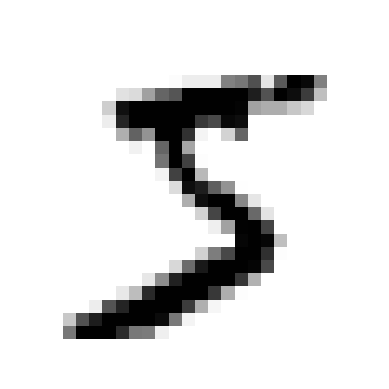

In [ ]:
plt.imshow(some_digit.reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()


**Let's try with Decision_function()**

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

***`The highest score is indeed the one corresponding to class 3:`***

In [ ]:
np.argmax(some_digit_scores)

np.int64(3)

In [ ]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
sgd_clf.classes_[5]


np.int64(5)

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5])

In [ ]:
len(ovo_clf.estimators_)

45

**Training a randomForestClassifier is just as easy:**

In [ ]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5])

In [ ]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

***`Now using cross_val_score()`***

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=-1)


array([0.8983, 0.891 , 0.9018])

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3, n_jobs=-1)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=2)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


There are lot's of numbers. It's often more convenient to look at an image representation of the confusion matrix, using Matplotlib's matshow() function:

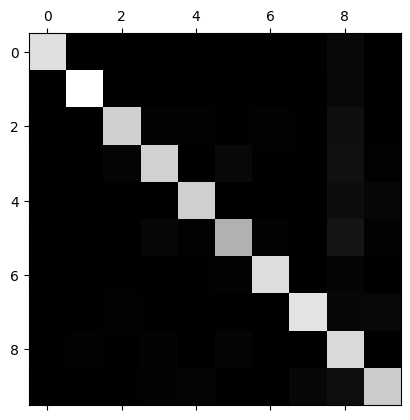

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

**rates instead of absolute number of errors (which would make abundant classes look
unfairly bad):**

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

**Now let's fill the diagonal with zeros to keep only the errors, and let's plot the result:**

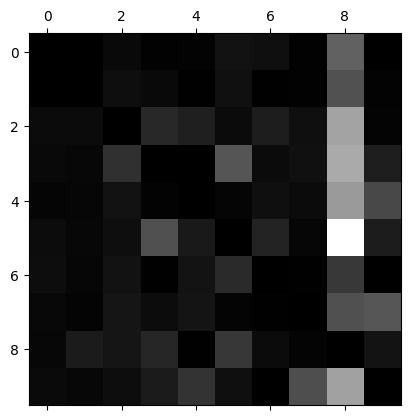

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

**For example, let’s plot examples of 3s and 5s (the plot_digits() function just uses
Matplotlib’s imshow() function; see this chapter’s Jupyter notebook for details):**

***Define the plot_digit function***

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    padded = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    image_grid = padded.reshape((n_rows, images_per_row, size, size))
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)
    plt.imshow(big_image, cmap="binary", **options)
    plt.axis("off")


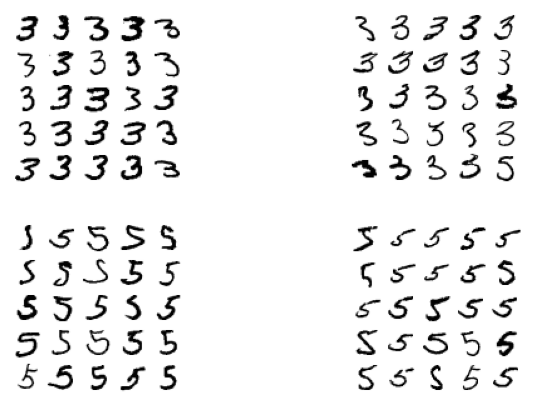

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,5))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

# ***`Multilabel Classification`***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
from sklearn.metrics import f1_score


y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")


0.9764102655606048

**`Multioutput Classification`**

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))

X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

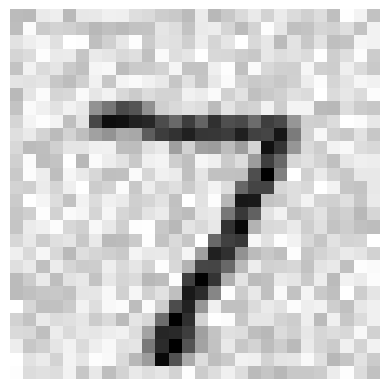

Predicted label: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  20 128  43   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  55 254 254 254
 254  63  63  63  71  84 128 188 2

In [ ]:
import matplotlib.pyplot as plt

# Function to plot a 28x28 digit image
def plot_digit(data):
    image = data.reshape(28, 28)  # reshape 1D array to 28x28
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.show()

some_index = 0

# Fit the KNN classifier
knn_clf.fit(X_train_mod, y_train_mod)

# Predict the label of the selected test image
clean_digit = knn_clf.predict([X_test_mod[some_index]])

# Show the original image
plot_digit(X_test_mod[some_index])

# Print the predicted label
print("Predicted label:", clean_digit[0])
